In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("res.csv", parse_dates=["local_timestamp", "timestamp"])
d = data[['timestamp', 'total_count', 'pos_em_count', 'neu_total_count',
       'em_total_count', 'pos_nem_count', 'pos_total_count', 'neu_em_count',
       'neg_nem_count', 'neg_em_count', 'neu_nem_count', 'neg_total_count',
       'nem_total_count']]
d = d.drop_duplicates(keep="last", subset = ["timestamp"])
d = d.set_index('timestamp')
d.to_csv("PARSED_STREAM_2022-11-10-12:44:00_2022-11-10-15:51:00.csv")

In [2]:
d = pd.read_csv("PARSED_STREAM_2022-11-10-12:44:00_2022-11-10-15:51:00.csv", parse_dates=["timestamp"])
d = d.set_index("timestamp")

In [3]:
d

,total_count,pos_em_count,neu_total_count,em_total_count,pos_nem_count,pos_total_count,neu_em_count,neg_nem_count,neg_em_count,neu_nem_count,neg_total_count,nem_total_count
timestamp,,,,,,,,,,,,
2022-11-10 12:44:00+00:00,20,3,3,5,10,13,2,4,0,1,4,15
2022-11-10 12:45:00+00:00,15,6,1,7,5,11,1,3,0,0,3,8
2022-11-10 12:46:00+00:00,6,2,0,4,1,3,0,1,2,0,3,2
2022-11-10 12:47:00+00:00,9,0,3,4,2,2,2,2,2,1,4,5
2022-11-10 12:48:00+00:00,2,1,0,2,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-10 15:47:00+00:00,21,3,1,8,7,10,0,5,5,1,10,13
2022-11-10 15:48:00+00:00,26,3,0,4,14,17,0,8,1,0,9,22
2022-11-10 15:49:00+00:00,25,7,2,13,6,13,2,6,4,0,10,12


<AxesSubplot:xlabel='timestamp'>

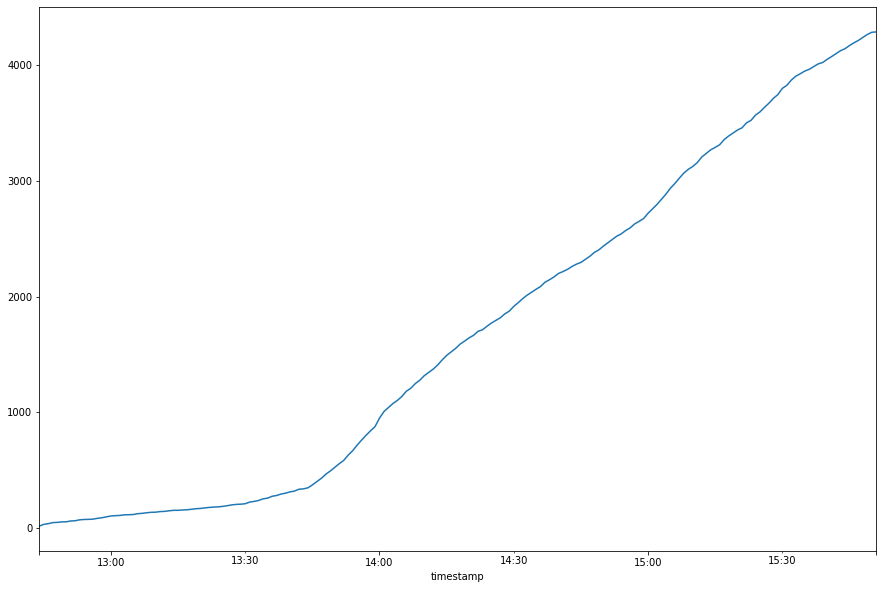

In [4]:
d.total_count.cumsum().plot(figsize = (15, 10))

<AxesSubplot:xlabel='timestamp'>

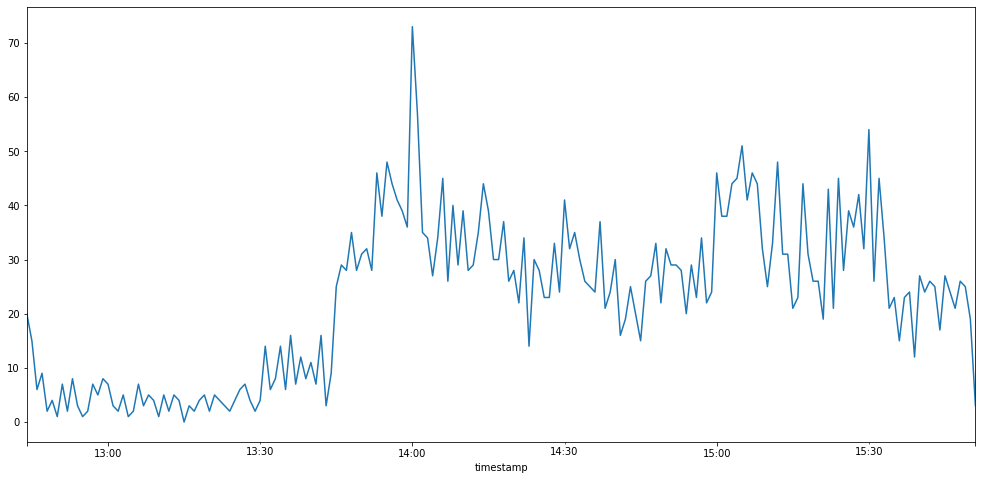

In [5]:
d.total_count.plot(figsize = (17, 8))

<AxesSubplot:xlabel='timestamp'>

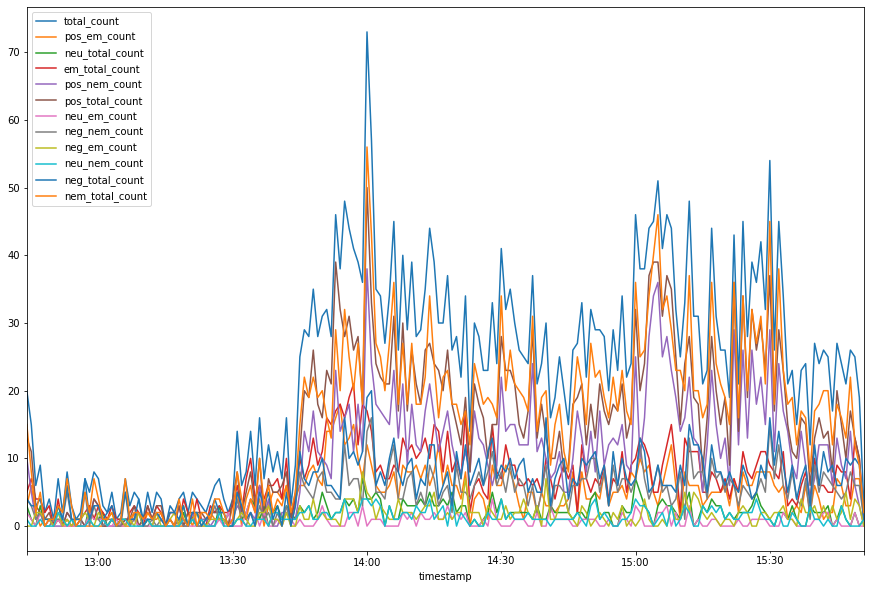

In [6]:
d.plot(figsize = (15, 10))

In [7]:
import matplotlib.pyplot as plt

## Sentiment dominance over time

In [8]:
CMAP = {1: "green", 0:"orange", -1:"red"}

In [9]:
def get_dominant(r):
    maxi = np.argmax(r, axis = 0)
    if maxi == 0:
        return 1
    if maxi == 1:
        return -1
    return 0

In [10]:
ratios = d.copy()
ratios["pos_ratio"] = d.pos_total_count / d.total_count
ratios["neg_ratio"] = d.neg_total_count / d.total_count
ratios["neu_ratio"] = d.neu_total_count / d.total_count
ratios = ratios[["pos_ratio", "neg_ratio", "neu_ratio"]]
ratios["dominant"] = [get_dominant(i) for i in ratios.values]

In [11]:
groups = ratios.groupby("dominant")

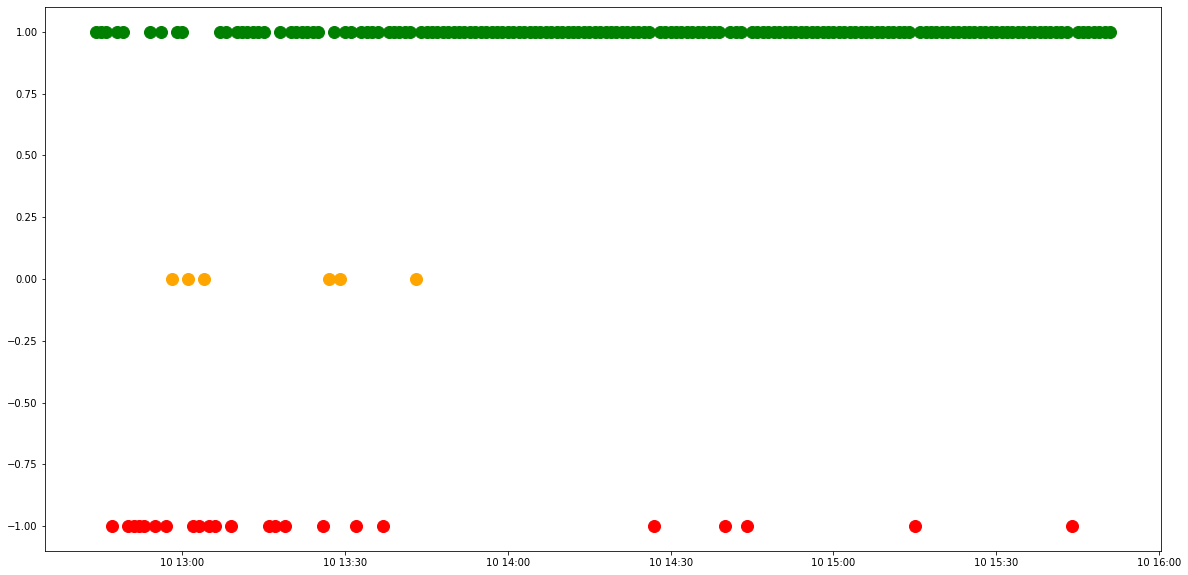

In [12]:
fig = plt.figure(figsize = (20, 10))
for name, group in groups:
    plt.plot(group.index, group.dominant, marker='o', linestyle='', markersize=12, label=name, color = CMAP[name])

<AxesSubplot:xlabel='timestamp'>

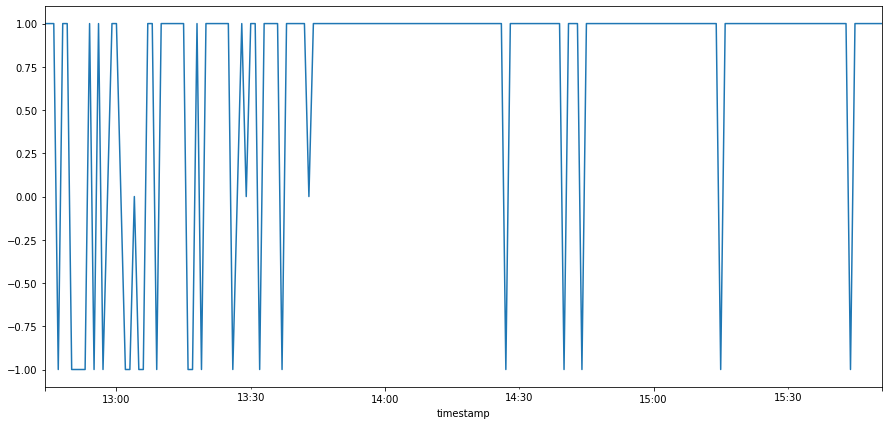

In [14]:
ratios.dominant.plot(figsize = (15, 7))

## Prices

In [34]:
from datetime import timezone
mindate, maxdate = min(d.index), max(d.index)

In [35]:
btcpath = "Binance_BTCUSDT_2022_minute.csv"
btc = pd.read_csv(btcpath, skiprows = 1, parse_dates=["date"])[['date',  'open', 'close', 'Volume BTC']][::-1]
btc["price"] = (btc.open + btc.close)/2
btc["timestamp"] = btc.date
btc = btc[["timestamp", "price", 'Volume BTC']]
btc['timestamp'] = btc['timestamp'].dt.tz_localize(timezone.utc)
btc = btc[btc.timestamp >= mindate]
btc = btc[btc.timestamp <= maxdate]
btc = btc.set_index("timestamp")

## Joined

In [36]:
dbtc = pd.merge(d, btc, left_index=True, right_index=True)

In [37]:
dbtc

,total_count,pos_em_count,neu_total_count,em_total_count,pos_nem_count,pos_total_count,neu_em_count,neg_nem_count,neg_em_count,neu_nem_count,neg_total_count,nem_total_count,price,Volume BTC
timestamp,,,,,,,,,,,,,,
2022-11-10 12:44:00+00:00,20,3,3,5,10,13,2,4,0,1,4,15,16582.780,327.51983
2022-11-10 12:45:00+00:00,15,6,1,7,5,11,1,3,0,0,3,8,16619.490,663.10886
2022-11-10 12:46:00+00:00,6,2,0,4,1,3,0,1,2,0,3,2,16642.675,503.07365
2022-11-10 12:47:00+00:00,9,0,3,4,2,2,2,2,2,1,4,5,16636.795,441.43838
2022-11-10 12:48:00+00:00,2,1,0,2,0,1,0,0,1,0,1,0,16643.370,380.98881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-10 15:47:00+00:00,21,3,1,8,7,10,0,5,5,1,10,13,17479.320,431.45493
2022-11-10 15:48:00+00:00,26,3,0,4,14,17,0,8,1,0,9,22,17471.500,261.00871
2022-11-10 15:49:00+00:00,25,7,2,13,6,13,2,6,4,0,10,12,17455.495,259.58651


In [38]:
dbtc.corr()

,total_count,pos_em_count,neu_total_count,em_total_count,pos_nem_count,pos_total_count,neu_em_count,neg_nem_count,neg_em_count,neu_nem_count,neg_total_count,nem_total_count,price,Volume BTC
total_count,1.000000,0.776035,0.545076,0.787034,0.930738,0.970207,0.220274,0.799068,0.355565,0.536413,0.796193,0.970043,0.782414,0.085873
pos_em_count,0.776035,1.000000,0.445609,0.922359,0.597371,0.789800,0.160140,0.500975,0.253941,0.454481,0.510406,0.630086,0.614393,0.271295
neu_total_count,0.545076,0.445609,1.000000,0.552080,0.396211,0.451383,0.645081,0.377488,0.188339,0.791286,0.383505,0.480277,0.454590,0.086356
em_total_count,0.787034,0.922359,0.552080,1.000000,0.568613,0.741957,0.368532,0.525422,0.553967,0.426934,0.639473,0.613591,0.629752,0.228029
pos_nem_count,0.930738,0.597371,0.396211,0.568613,1.000000,0.963701,0.123952,0.659302,0.188072,0.418852,0.618798,0.967402,0.711411,0.021713
pos_total_count,0.970207,0.789800,0.451383,0.741957,0.963701,1.000000,0.148115,0.671034,0.228383,0.471653,0.643195,0.949660,0.748646,0.106924
neu_em_count,0.220274,0.160140,0.645081,0.368532,0.123952,0.148115,1.000000,0.141662,0.110916,0.043230,0.158491,0.136820,0.189067,0.060880
neg_nem_count,0.799068,0.500975,0.377488,0.525422,0.659302,0.671034,0.141662,1.000000,0.282995,0.380201,0.937745,0.815876,0.640160,-0.007239
neg_em_count,0.355565,0.253941,0.188339,0.553967,0.188072,0.228383,0.110916,0.282995,1.000000,0.157494,0.598503,0.236966,0.292744,-0.009947
neu_nem_count,0.536413,0.454481,0.791286,0.426934,0.418852,0.471653,0.043230,0.380201,0.157494,1.000000,0.374601,0.518470,0.443077,0.064193


<AxesSubplot:xlabel='timestamp'>

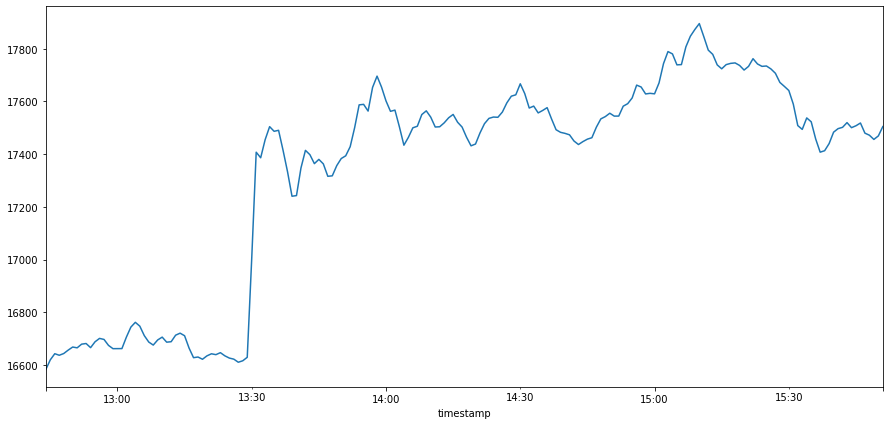

In [39]:
dbtc.price.plot(figsize = (15, 7))

<AxesSubplot:xlabel='timestamp'>

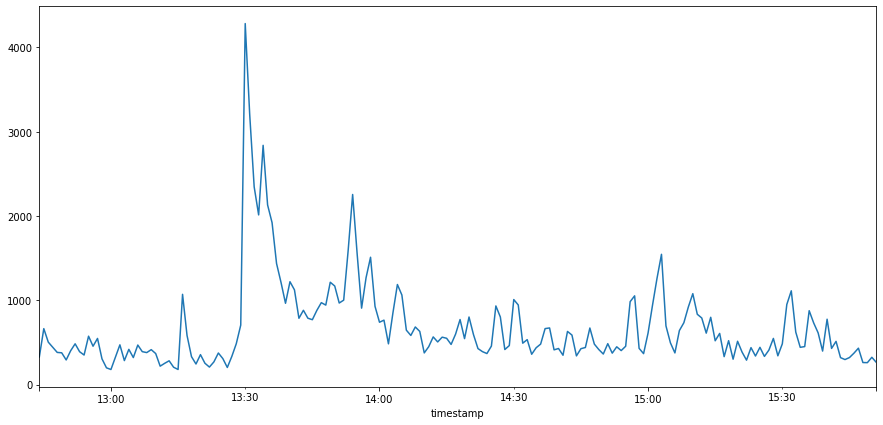

In [40]:
dbtc["Volume BTC"].plot(figsize = (15, 7))

In [41]:
dbtc["pospercent"] = d.pos_em_count / d.em_total_count

In [42]:
def min_max_scaling(df):
    df_norm = pd.DataFrame()
    for column in ["pospercent", "price", "Volume BTC"]:
                df_norm[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
    return df_norm


In [43]:
dbtc.columns

Index(['total_count', 'pos_em_count', 'neu_total_count', 'em_total_count',
       'pos_nem_count', 'pos_total_count', 'neu_em_count', 'neg_nem_count',
       'neg_em_count', 'neu_nem_count', 'neg_total_count', 'nem_total_count',
       'price', 'Volume BTC', 'pospercent'],
      dtype='object')

In [44]:
mmnormed = min_max_scaling(dbtc)

<AxesSubplot:xlabel='timestamp'>

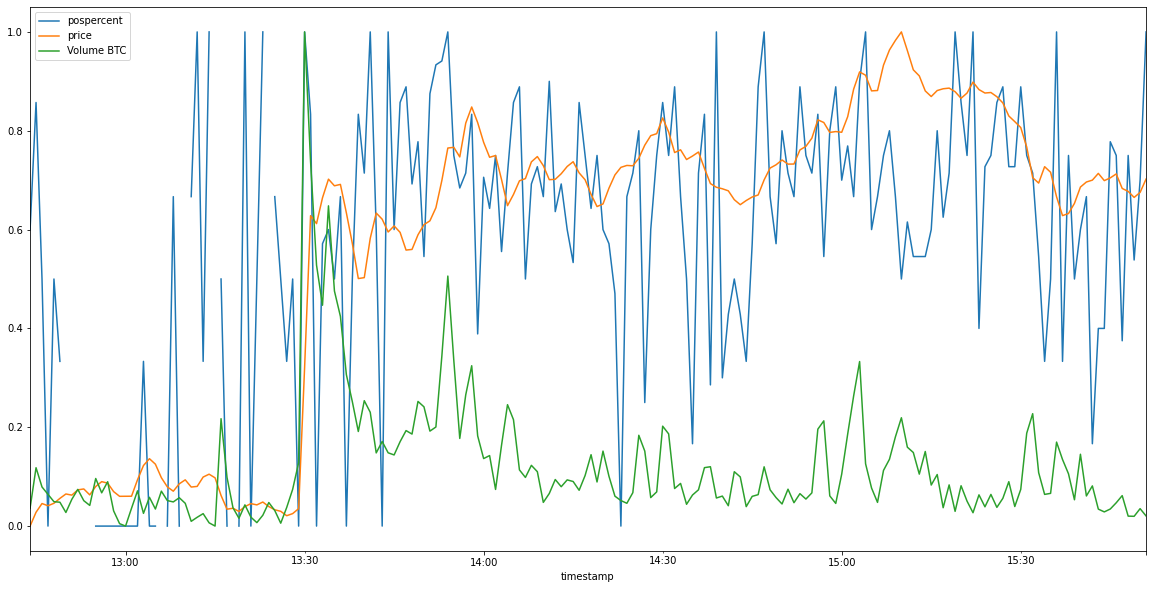

In [45]:
mmnormed.plot(figsize = (20, 10))

# Corrs

### Shifted volume vs total_count

In [46]:
for i in range(50):
    print(i, 
          "Pearson " + str(round(dbtc["Volume BTC"].shift(i).corr(dbtc.total_count, method = "pearson"), 2)),
          "Kendall " + str(round(dbtc["Volume BTC"].shift(i).corr(dbtc.total_count, method = "kendall"), 2)),
         )

0 Pearson 0.09 Kendall 0.25
1 Pearson 0.12 Kendall 0.26
2 Pearson 0.13 Kendall 0.27
3 Pearson 0.12 Kendall 0.24
4 Pearson 0.13 Kendall 0.29
5 Pearson 0.12 Kendall 0.27
6 Pearson 0.16 Kendall 0.26
7 Pearson 0.12 Kendall 0.25
8 Pearson 0.12 Kendall 0.26
9 Pearson 0.12 Kendall 0.27
10 Pearson 0.17 Kendall 0.33
11 Pearson 0.17 Kendall 0.28
12 Pearson 0.2 Kendall 0.3
13 Pearson 0.18 Kendall 0.29
14 Pearson 0.25 Kendall 0.32
15 Pearson 0.31 Kendall 0.35
16 Pearson 0.34 Kendall 0.36
17 Pearson 0.36 Kendall 0.4
18 Pearson 0.34 Kendall 0.34
19 Pearson 0.35 Kendall 0.33
20 Pearson 0.4 Kendall 0.36
21 Pearson 0.41 Kendall 0.36
22 Pearson 0.39 Kendall 0.34
23 Pearson 0.41 Kendall 0.3
24 Pearson 0.41 Kendall 0.3
25 Pearson 0.43 Kendall 0.31
26 Pearson 0.41 Kendall 0.27
27 Pearson 0.37 Kendall 0.23
28 Pearson 0.33 Kendall 0.21
29 Pearson 0.36 Kendall 0.24
30 Pearson 0.41 Kendall 0.24
31 Pearson 0.28 Kendall 0.2
32 Pearson 0.19 Kendall 0.15
33 Pearson 0.15 Kendall 0.11
34 Pearson 0.16 Kendall 0.11
35

### Shifted volume vs positive_emotional_count

In [47]:
for i in range(50):
    print(i, dbtc["Volume BTC"].shift(i).corr(dbtc.pos_em_count))

0 0.27129545755250184
1 0.23278435098998182
2 0.21091079154571124
3 0.22943656082793726
4 0.25410962466643944
5 0.21363081270629208
6 0.22871541172351004
7 0.1628698825087159
8 0.19507996914843184
9 0.18265821276459338
10 0.24060008593947285
11 0.2598784331632204
12 0.26115552841126644
13 0.2525232995152936
14 0.3322687709509151
15 0.38968643581544865
16 0.4194728973904472
17 0.5127845127473964
18 0.5199173584934217
19 0.4989698474009262
20 0.5298544918007032
21 0.6001427024976513
22 0.59283836080662
23 0.560262850693428
24 0.5072557521227091
25 0.3977259560368874
26 0.3607317605197695
27 0.282379450235194
28 0.18960685460056237
29 0.12391074662479255
30 0.13971333380687836
31 0.07873418080264652
32 0.010706086643299695
33 -0.007145378008056692
34 0.020397296785599723
35 0.08633556614726248
36 0.0943120549769471
37 0.07988926856528591
38 0.1061139249506237
39 0.04409950521207876
40 0.012618831889472028
41 0.046287463630620966
42 0.042688509087678836
43 -0.00965281992011544
44 -0.038613